# Time Series Forecasting of Stock Market Data with ARIMA in Python


Author: Dr. Muhammad Aammar Tufail\
[<img src="https://raw.githubusercontent.com/FortAwesome/Font-Awesome/6.x/svgs/brands/youtube.svg" width="50" height="50">](https://www.youtube.com/channel/UCmNXJXWONLNF6bdftGY0Otw/)
[<img src="https://raw.githubusercontent.com/FortAwesome/Font-Awesome/6.x/svgs/brands/linkedin.svg" width="50" height="50">](https://www.linkedin.com/in/dr-muhammad-aammar-tufail-02471213b/)
[<img src="https://raw.githubusercontent.com/FortAwesome/Font-Awesome/6.x/svgs/brands/github.svg" width="50" height="50">](https://github.com/AammarTufail)
[<img src="https://raw.githubusercontent.com/FortAwesome/Font-Awesome/6.x/svgs/brands/twitter.svg" width="50" height="50">](https://twitter.com/aammar_tufail)
[<img src="https://raw.githubusercontent.com/FortAwesome/Font-Awesome/6.x/svgs/brands/facebook.svg" width="50" height="50">](https://www.facebook.com/groups/codanics/permalink/)


# 1. Time Series Data
`Time series` data is a type of data that is collected over time at regular intervals. It is a sequence of data points that are ordered chronologically and can be used to analyze trends, patterns, and behaviors over time. Time series data can be collected from a variety of sources, such as sensors, financial markets, weather stations, and social media platforms.

Examples of time series data include stock prices, temperature readings, website traffic, and sales data. Time series data can be analyzed using various statistical and machine learning techniques, such as regression analysis, ARIMA models, and deep learning models.

Time series data is often used in forecasting and prediction applications, where the goal is to predict future values based on past observations. Time series analysis can also be used to identify anomalies, trends, and seasonality in the data, which can provide insights into the underlying processes that generate the data.

`Overall,` time series data is an important type of data that is used in many different fields, including finance, economics, engineering, and social sciences.

- `Time series` data is a sequence of data points collected over time that can be used to analyze trends and patterns. It can be collected from various sources and analyzed using statistical and machine learning techniques. 
- `Time series forecasting` is the process of predicting future values based on past observations. Time series data is used in many different fields, including finance, economics, engineering, and social sciences.

# Stock Market Data scraping in Python

In [3]:
# imporot libraries
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
import yfinance as yf
import datetime as dt
from datetime import date, timedelta
import plotly.graph_objects as go
import plotly.express as px

from statsmodels.tsa.stattools import adfuller # test for stationarity
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [4]:
date.today()

datetime.date(2025, 8, 17)

In [5]:
# define the dates to fetch data
today = date.today()
d1 = today.strftime("%Y-%m-%d")
end_date = d1
d2 = date.today() - timedelta(days=365)
d2 = d2.strftime("%Y-%m-%d")
start_date = d2
print("Your data will be between these dates: ", start_date, end_date)

Your data will be between these dates:  2024-08-17 2025-08-17


In [6]:
# deifne the ticker
ticker = 'GOOGL'

df = yf.download(ticker, start=start_date, end=end_date, progress=False)
df.head()

/tmp/ipykernel_232094/1290228081.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date, end=end_date, progress=False)


Price,Close,High,Low,Open,Volume
Ticker,GOOGL,GOOGL,GOOGL,GOOGL,GOOGL
Date,,,,,
2024-08-19,165.866531,165.886439,163.468146,164.483233,22416200
2024-08-20,166.374069,167.827038,166.015819,166.095420,18341500
2024-08-21,165.050491,166.045671,163.876172,164.353854,22902000
2024-08-22,163.010361,166.782083,162.522717,166.453672,22493300
2024-08-23,164.821594,165.378892,163.040230,163.925939,13955700


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 249 entries, 2024-08-19 to 2025-08-15
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   (Close, GOOGL)   249 non-null    float64
 1   (High, GOOGL)    249 non-null    float64
 2   (Low, GOOGL)     249 non-null    float64
 3   (Open, GOOGL)    249 non-null    float64
 4   (Volume, GOOGL)  249 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 11.7 KB


In [8]:
df.insert(0, "Date", df.index, True)
# df["Date"] = df.index
df.reset_index(drop=True, inplace=True)

In [9]:
df.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,GOOGL,GOOGL,GOOGL,GOOGL,GOOGL
0,2024-08-19,165.866531,165.886439,163.468146,164.483233,22416200
1,2024-08-20,166.374069,167.827038,166.015819,166.095420,18341500
2,2024-08-21,165.050491,166.045671,163.876172,164.353854,22902000
3,2024-08-22,163.010361,166.782083,162.522717,166.453672,22493300
4,2024-08-23,164.821594,165.378892,163.040230,163.925939,13955700


In [10]:
# make a plot on plotly
# fig = px.line(df, x='Date', y=df.columns, title='Stock Price')
# fig.show()

df.columns = ['_'.join(col).strip() if isinstance(col, tuple) else col for col in df.columns]
df = df.rename(columns={'Date_': 'Date', 
                        'Open_GOOGL': 'Open', 
                        'High_GOOGL': 'High', 
                        'Low_GOOGL': 'Low', 
                        'Close_GOOGL': 'Close', 
                        # 'Adj Close': 'Adj_Close_GOOGL', 
                        'Volume_GOOGL': 'Volume'})

print(df.head())
fig = px.line(df, x='Date', y=df.columns, title='Stock Price')
fig.show()

        Date       Close        High         Low        Open    Volume
0 2024-08-19  165.866531  165.886439  163.468146  164.483233  22416200
1 2024-08-20  166.374069  167.827038  166.015819  166.095420  18341500
2 2024-08-21  165.050491  166.045671  163.876172  164.353854  22902000
3 2024-08-22  163.010361  166.782083  162.522717  166.453672  22493300
4 2024-08-23  164.821594  165.378892  163.040230  163.925939  13955700


/home/tk-lpt-648/miniconda3/envs/data_analysis/lib/python3.10/site-packages/kaleido/__init__.py:14: UserWarning:




This means that static image generation (e.g. `fig.write_image()`) will not work.

Please upgrade Plotly to version 6.1.1 or greater, or downgrade Kaleido to version 0.2.1.




In [11]:
df.describe()

,Date,Close,High,Low,Open,Volume
count,249,249.000000,249.000000,249.000000,249.000000,2.490000e+02
mean,2025-02-15 10:24:34.698795264,173.523023,175.564199,171.474536,173.532068,3.271478e+07
min,2024-08-19 00:00:00,144.525040,148.769891,140.360075,141.378846,1.040330e+07
25%,2024-11-14 00:00:00,163.017410,165.169895,161.711994,163.136976,2.212380e+07
50%,2025-02-18 00:00:00,170.663391,172.960611,168.116478,170.134037,2.960770e+07
75%,2025-05-16 00:00:00,184.883011,185.960437,183.157068,184.713388,3.860460e+07
max,2025-08-15 00:00:00,205.893341,206.561759,202.331752,204.130005,1.274901e+08
std,NaN,14.424761,14.286452,14.342294,14.206003,1.536167e+07


In [12]:
# select columns
df = df[['Date', 'Close']]
df.head()

,Date,Close
0,2024-08-19,165.866531
1,2024-08-20,166.374069
2,2024-08-21,165.050491
3,2024-08-22,163.010361
4,2024-08-23,164.821594


In [13]:
# plot the data to see how it looks like using plotly
fig = px.line(df, x='Date', y='Close', title='Google Stock Price')
fig.show()

#

In [14]:
# stationarity check on data
from statsmodels.tsa.stattools import adfuller
def adf_test(df):
    result = adfuller(df)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    if result[1] <= 0.05:
        print("Reject the null hypothesis. Data is stationary")
    else:
        print("Fail to reject the null hypothesis. Data is not stationary")

adf_test(df['Close'])

ADF Statistic: -1.275743
p-value: 0.640196
Fail to reject the null hypothesis. Data is not stationary


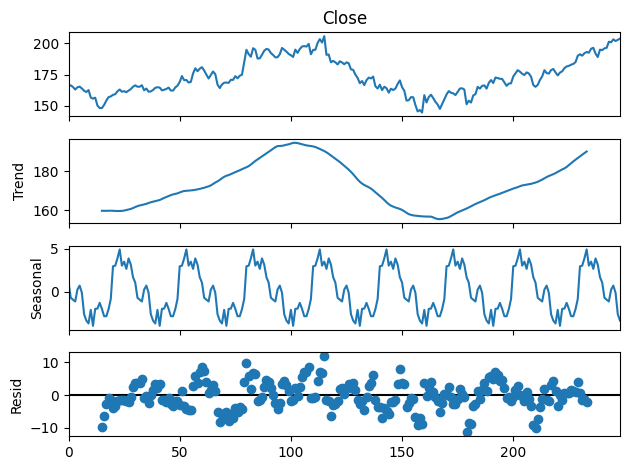

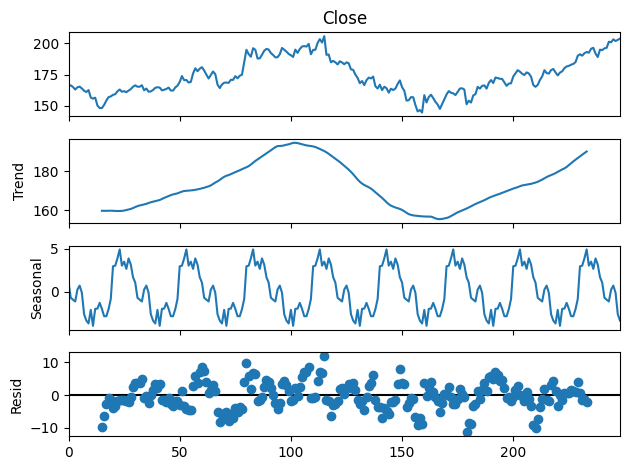

In [15]:
# decompose the data to see the trend, seasonality and noise
from statsmodels.tsa.seasonal import seasonal_decompose
decompose = seasonal_decompose(df['Close'], model='additive', period=30)
decompose.plot()

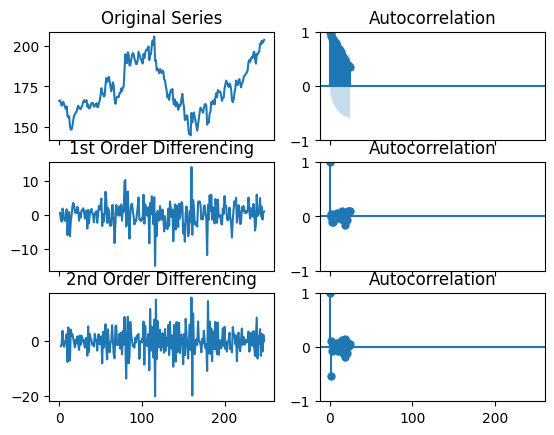

In [16]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(df['Close']); axes[0, 0].set_title('Original Series')
plot_acf(df['Close'], ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(df['Close'].diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df['Close'].diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df['Close'].diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df['Close'].diff().diff().dropna(), ax=axes[2, 1])

plt.show()

`d = 1`

# Lets find `p` value

In [17]:
# plots
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# pd.plotting.autocorrelation_plot(df['Close'])

# # plot_acf(df['Close'], alpha=0.05)

from statsmodels.tsa.stattools import acf, pacf
x_acf = pd.DataFrame(acf(df['Close']))
print(x_acf)

           0
0   1.000000
1   0.963318
2   0.927869
3   0.890324
4   0.857481
5   0.832156
6   0.808090
7   0.784770
8   0.760819
9   0.736192
10  0.708193
11  0.684576
12  0.658456
13  0.630987
14  0.601129
15  0.571751
16  0.535993
17  0.504714
18  0.476500
19  0.445166
20  0.423006
21  0.404102
22  0.389105
23  0.368869


`p = 2` --> value less than 0.95

# Lets find `q` value

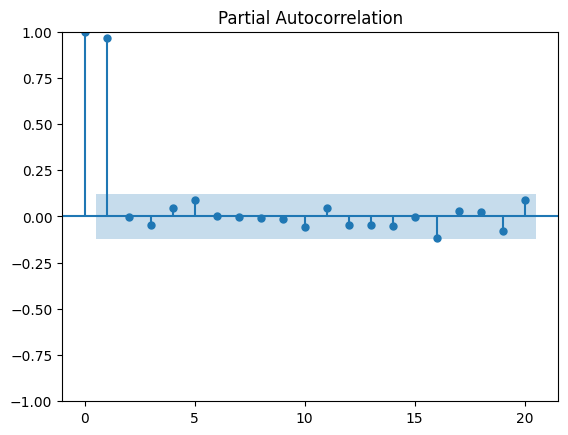

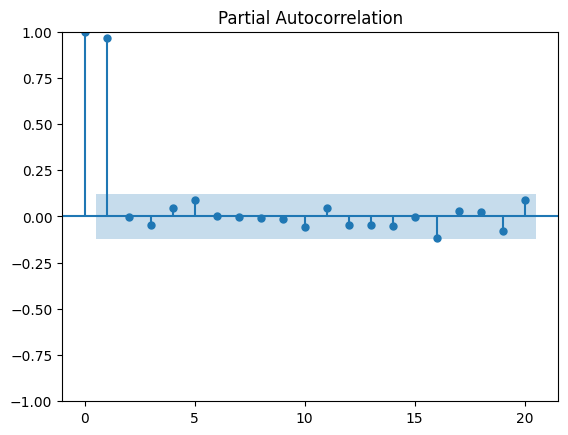

In [18]:
# partial autocorrelation
from statsmodels.tsa.stattools import acf, pacf
plot_pacf(df['Close'], lags=20, alpha=0.05)

In [19]:
# lets define p, d, q
p = 2
d = 1
q = 2

In [ ]:
# lets run arima with pmdarima
from pmdarima.arima import auto_arima

model = auto_arima(df['Close'], start_p=1, start_q=1, max_p=2, max_q=2, m=12, start_P=0, seasonal=True, d=1, D=1, trace=True, error_action='ignore', suppress_warnings=True)

In [92]:
print(model.summary())

                                      SARIMAX Results                                      
Dep. Variable:                                   y   No. Observations:                  251
Model:             SARIMAX(1, 1, 1)x(2, 1, [], 12)   Log Likelihood                -582.114
Date:                             Sat, 24 Jun 2023   AIC                           1174.228
Time:                                     10:11:11   BIC                           1191.590
Sample:                                          0   HQIC                          1181.225
                                             - 251                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9117      0.059     15.524      0.000       0.797       1.027
ma.L1         -0.9736      

In [93]:
model = auto_arima(df['Close'], seasonal=True, suppress_warnings=True)
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  251
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -570.633
Date:                Sat, 24 Jun 2023   AIC                           1143.266
Time:                        10:12:05   BIC                           1146.787
Sample:                             0   HQIC                          1144.683
                                - 251                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         5.6248      0.364     15.454      0.000       4.911       6.338
Ljung-Box (L1) (Q):                   0.11   Jarque-Bera (JB):                35.06
Prob(Q):                              0.74   Pr

                                SARIMAX Results                                
Dep. Variable:                   Close   No. Observations:                  249
Model:                  ARIMA(2, 1, 2)   Log Likelihood                -648.929
Date:              اتوار, 17 اگست 2025   AIC                           1307.857
Time:                         12:25:08   BIC                           1325.424
Sample:                              0   HQIC                          1314.929
                                 - 249                                         
Covariance Type:                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2756      0.026     10.778      0.000       0.226       0.326
ar.L2         -0.9608      0.025    -37.756      0.000      -1.011      -0.911
ma.L1         -0.2363      0.031     -7.514 

/home/tk-lpt-648/miniconda3/envs/data_analysis/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



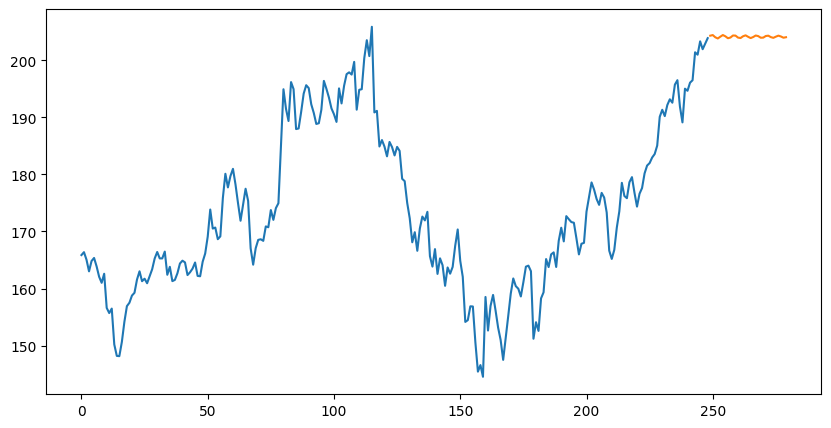

In [26]:
# stats model and arima
from statsmodels.tsa.arima.model import ARIMA
p, d, q = 2, 1, 2

model = ARIMA(df['Close'], order=(p, d, q))
model = model.fit()
print(model.summary())

# predict next 30 days
forecast = model.predict(len(df["Close"]), len(df['Close'])+30)
# print(forecast)

#plot forecast
plt.figure(figsize=(10, 5))
plt.plot(df['Close'], label='Actual')
plt.plot(forecast, label='Forecast')

In [27]:
# let's run SARIMA
import statsmodels.api as sm
import warnings

p , d, q = 2, 1, 2

model = sm.tsa.statespace.SARIMAX(df['Close'], 
                                  order=(p, d, q), 
                                  seasonal_order=(p, d, q, 12))
model = model.fit()
print(model.summary())

/home/tk-lpt-648/miniconda3/envs/data_analysis/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                  249
Model:             SARIMAX(2, 1, 2)x(2, 1, 2, 12)   Log Likelihood                -638.728
Date:                         اتوار, 17 اگست 2025   AIC                           1295.456
Time:                                    12:29:11   BIC                           1326.631
Sample:                                         0   HQIC                          1308.023
                                            - 249                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0548      1.505      0.036      0.971      -2.894       3.004
ar.L2          0.5447      0.797   

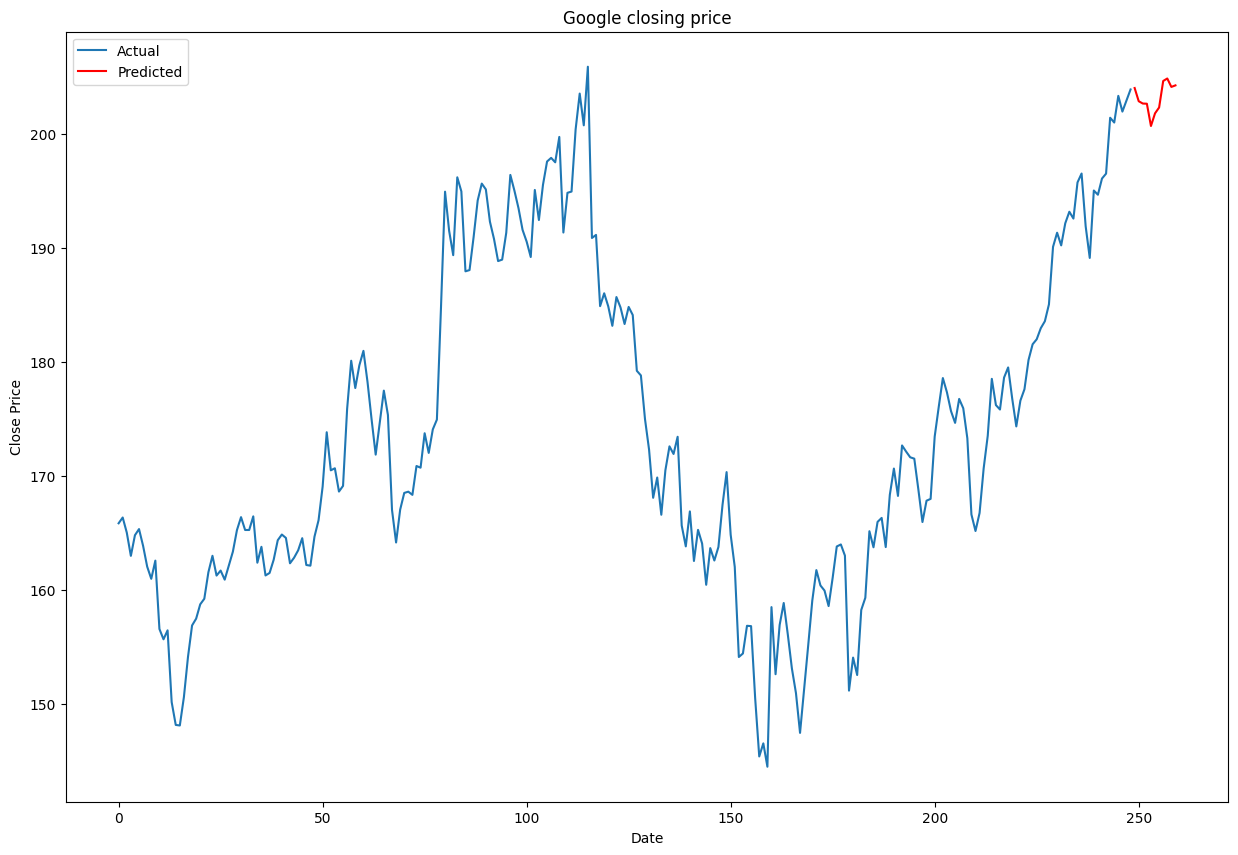

In [28]:
predictions = model.predict(start=len(df['Close']), end=len(df['Close'])+10)

# plot the predictions
plt.figure(figsize=(15, 10))
plt.plot(df["Close"], label='Actual')
plt.plot(predictions, color='red', label='Predicted')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Google closing price')
# change legend location
plt.legend(loc='upper left')
plt.show()


/home/tk-lpt-648/miniconda3/envs/data_analysis/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



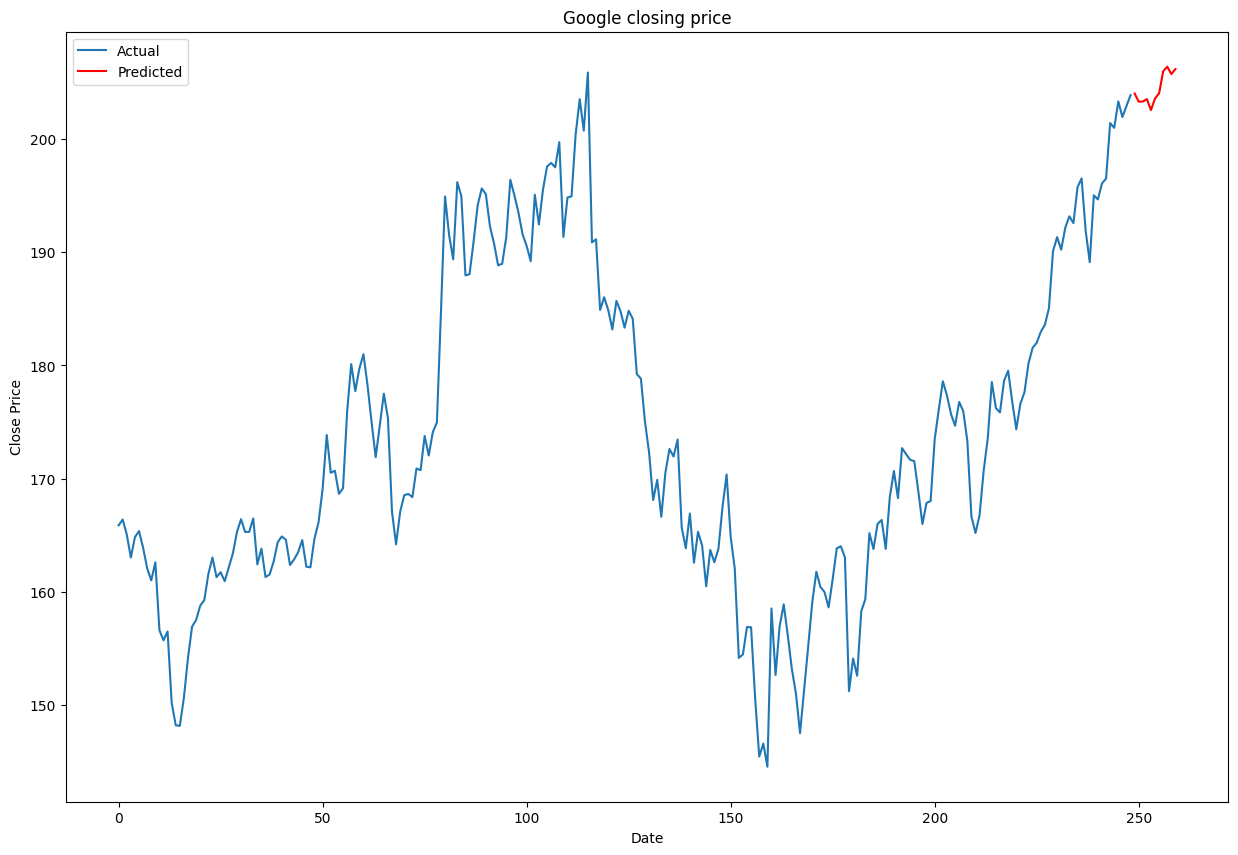

In [29]:
# lets update p, d, q
# let's run SARIMA
import statsmodels.api as sm
import warnings

p , d, q = 3, 1, 2

model = sm.tsa.statespace.SARIMAX(df['Close'], 
                                  order=(p, d, q), 
                                  seasonal_order=(p, d, q, 12))
model = model.fit()
predictions = model.predict(start=len(df['Close']), end=len(df['Close'])+10)

# plot the predictions
plt.figure(figsize=(15, 10))
plt.plot(df["Close"], label='Actual')
plt.plot(predictions, color='red', label='Predicted')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Google closing price')
# change legend location
plt.legend(loc='upper left')
plt.show()

# hyper paramter tuning

/home/tk-lpt-648/miniconda3/envs/data_analysis/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Best SARIMA(0, 1, 1)x(0, 1, 1, 12)12 model - AIC:1212.082140773212


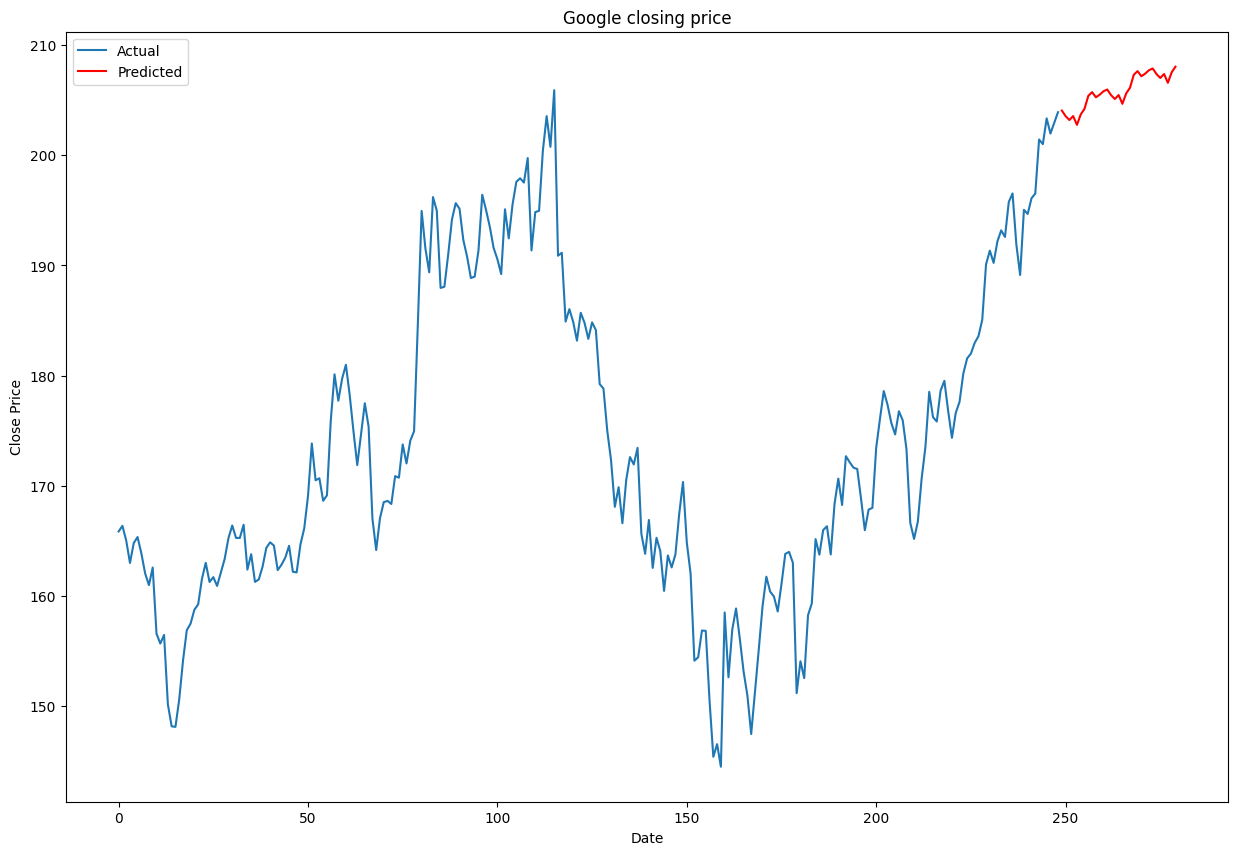

In [30]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
import numpy as np
import itertools

# Assume you have a DataFrame 'df' with your time series data in a column named 'value'
# Assume that the seasonal period of your time series data is 12 (e.g., monthly data)

# Define the p, d, q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, d and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, d, q and m quadruplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

best_aic = np.inf
best_pdq = None
best_seasonal_pdq = None
temp_model = None

for param in pdq:
    for param_seasonal in seasonal_pdq:
        
        try:
            temp_model = SARIMAX(df['Close'],
                                 order = param,
                                 seasonal_order = param_seasonal,
                                 enforce_stationarity=False,
                                 enforce_invertibility=False)
            results = temp_model.fit()

            # print("SARIMA{}x{}12 - AIC:{}".format(param, param_seasonal, results.aic))
            if results.aic < best_aic:
                best_aic = results.aic
                best_pdq = param
                best_seasonal_pdq = param_seasonal
        except:
            continue

print("Best SARIMA{}x{}12 model - AIC:{}".format(best_pdq, best_seasonal_pdq, best_aic))

# predict next 30 days
model = SARIMAX(df['Close'],
                order = best_pdq,
                seasonal_order = best_seasonal_pdq,
                enforce_stationarity=False,
                enforce_invertibility=False)
model = model.fit()
predictions = model.predict(len(df['Close']), len(df['Close'])+30)
# plot the predictions
plt.figure(figsize=(15, 10))
plt.plot(df["Close"], label='Actual')
plt.plot(predictions, color='red', label='Predicted')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Google closing price')
# change legend location
plt.legend(loc='upper left')
plt.show()


In [31]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Close   No. Observations:                  249
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -603.041
Date:                         اتوار, 17 اگست 2025   AIC                           1212.082
Time:                                    12:53:11   BIC                           1222.290
Sample:                                         0   HQIC                          1216.204
                                            - 249                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0161      0.061     -0.261      0.794      -0.136       0.104
ma.S.L12      -0.9668      0.136     -7.109      0.000      -1.233      -0.700
sigma2        12.1858      1.473      8.274      0.000       9.299      15.073
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                68.71
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               1.09   Skew:                            -0.38
Prob(H) (two-sided):                  0.72   Kurtosis:                         5.62
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""